In [1]:
from openai import AzureOpenAI

In [2]:
HEADER_EXTRACTIONS = """
Extract the headers in the given Markdown table. Return only the headers as a comma-separated list without any additional text or explanations.

Note that in some cases, the table has more rows with headers (in case the table is within a table), it needs to go through all the markdown tables at once.

Table Input:

{table_input}

Output: [List of headers]
"""



Data URL: 

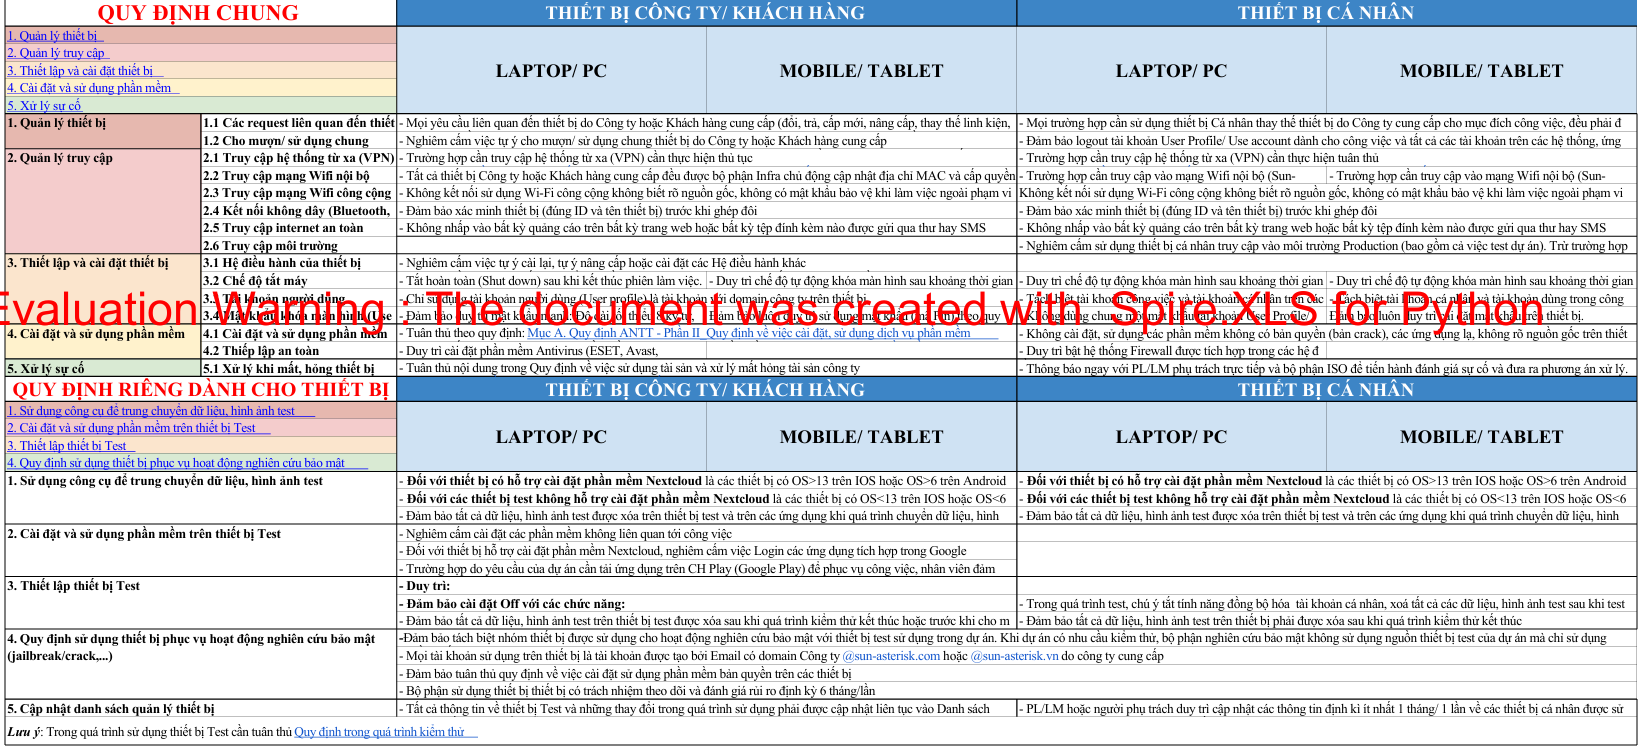

In [3]:
import base64
from mimetypes import guess_type

# Function to encode a local image into data URL 
def local_image_to_data_url(image_path):
    # Guess the MIME type of the image based on the file extension
    mime_type, _ = guess_type(image_path)
    if mime_type is None:
        mime_type = 'application/octet-stream'  # Default MIME type if none is found

    # Read and encode the image file
    with open(image_path, "rb") as image_file:
        base64_encoded_data = base64.b64encode(image_file.read()).decode('utf-8')

    # Construct the data URL
    return f"data:{mime_type};base64,{base64_encoded_data}"

# Example usage
image_path = 'image.png'
data_url = local_image_to_data_url(image_path)
print("Data URL:", data_url)


In [4]:
from dotenv import load_dotenv
import os 

load_dotenv()
deployment_name = os.getenv("GPT4O__DEPLOYMENT_NAME")
client = AzureOpenAI(
    api_key=os.environ["GPT4O__KEY"],
    azure_endpoint=os.environ["GPT4O__ENDPOINT"],
    api_version=os.environ["GPT4O__API_VERSION"],
)


In [5]:
table_input = """
|**QUY ĐỊNH CHUNG<br>Áp dụng với tất cả các thiết bị được sử dụng trong công việc**|**QUY ĐỊNH CHUNG<br>Áp dụng với tất cả các thiết bị được sử dụng trong công việc**|**THIẾT BỊ CÔNG TY/ KHÁCH HÀNG**|**THIẾT BỊ CÔNG TY/ KHÁCH HÀNG**|**THIẾT BỊ CÁ NHÂN**|**THIẾT BỊ CÁ NHÂN**|
|---|---|---|---|---|---|
|[1. Quản lý thiết bị](None)|[1. Quản lý thiết bị](None)|**LAPTOP/ PC**|**MOBILE/ TABLET**|**LAPTOP/ PC**|**MOBILE/ TABLET**|
|[2. Quản lý truy cập](None)|[2. Quản lý truy cập](None)|**LAPTOP/ PC**|**MOBILE/ TABLET**|**LAPTOP/ PC**|**MOBILE/ TABLET**|
|[3. Thiết lập và cài đặt thiết bị](None)|[3. Thiết lập và cài đặt thiết bị](None)|**LAPTOP/ PC**|**MOBILE/ TABLET**|**LAPTOP/ PC**|**MOBILE/ TABLET**|
|[4. Cài đặt và sử dụng phần mềm](None)|[4. Cài đặt và sử dụng phần mềm](None)|**LAPTOP/ PC**|**MOBILE/ TABLET**|**LAPTOP/ PC**|**MOBILE/ TABLET**|
"""

In [6]:
prompt = HEADER_EXTRACTIONS.format(table_input=table_input)

In [7]:
output = client.chat.completions.create(
        model=deployment_name,
        messages=[
            {"role": "user", "content": [
	            {
	                "type": "text",
	                "text": prompt
	            },
                {
	                "type": "image_url",
	                "image_url": {
                        "url": data_url
                    }
                } 
           ] },
            
        ],
        temperature=0.5,
        seed=42,
    )
print(output.choices[0].message.content)

NotFoundError: Error code: 404 - {'error': {'code': 'DeploymentNotFound', 'message': 'The API deployment for this resource does not exist. If you created the deployment within the last 5 minutes, please wait a moment and try again.'}}